In [2]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import geopy.distance
from tqdm import tqdm
from IPython.display import display
import numpy as np

#from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

#from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(r'F:\train.csv',nrows=200000)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [6]:
data.drop(['key'], axis=1, inplace=True)

In [7]:
target = 'fare_amount'
features = [i for i in data.columns if i not in [target]]

In [8]:
data.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [401]:
#testdata = pd.read_csv(r'C:\Users\Admin\Downloads\test\test.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [10]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [11]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.342877,-72.506121,39.922326,-72.518673,39.925579,1.682445
std,9.837855,11.608097,10.048947,10.724226,6.751120,1.306730
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992050,40.735007,-73.991295,40.734092,1.000000
50%,8.500000,-73.981743,40.752761,-73.980072,40.753225,1.000000
75%,12.500000,-73.967068,40.767127,-73.963508,40.768070,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [12]:
nvc = pd.DataFrame(data.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/data.shape[0],3)*100
print(nvc)
data.dropna(inplace=True)

                   Total Null Values  Percentage
fare_amount                        0         0.0
pickup_datetime                    0         0.0
pickup_longitude                   0         0.0
pickup_latitude                    0         0.0
passenger_count                    0         0.0
dropoff_longitude                  1         0.0
dropoff_latitude                   1         0.0


In [13]:
data.shape[0]

199999

In [14]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [15]:
min_lat = -90
max_lat = 90
min_long = -180
max_long = 180

In [16]:
data.drop(data[(data['pickup_longitude'] < min_long) | (data['pickup_longitude'] > max_long)].index, inplace=True)
data.drop(data[(data['dropoff_longitude'] < min_long) | (data['dropoff_longitude'] > max_long)].index, inplace=True)
data.drop(data[(data['pickup_latitude'] < min_lat) | (data['pickup_latitude'] > max_lat)].index, inplace=True)
data.drop(data[(data['dropoff_latitude'] < min_lat) | (data['dropoff_latitude'] > max_lat)].index, inplace=True)

In [17]:
data['date'] = data['pickup_datetime'].apply(lambda d: d.day)
data['month'] = data['pickup_datetime'].apply(lambda d: d.month)
data['year'] = data['pickup_datetime'].apply(lambda d: d.year)
data['day'] = data['pickup_datetime'].apply(lambda d: d.weekday)
data['hour'] = data['pickup_datetime'].apply(lambda d: d.hour)
data['Distance']=[round(geopy.distance.distance((data.pickup_latitude[i], data.pickup_longitude[i]),(data.dropoff_latitude[i], data.dropoff_longitude[i])).m,2) for i in data.index]
data['Monthly_Quarter'] = data.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
                                      8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})
data['Hourly_Segments'] = data.hour.map({0:'H1',1:'H1',2:'H1',3:'H1',4:'H2',5:'H2',6:'H2',7:'H2',8:'H3',
                                     9:'H3',10:'H3',11:'H3',12:'H4',13:'H4',14:'H4',15:'H4',16:'H5',
                                     17:'H5',18:'H5',19:'H5',20:'H6',21:'H6',22:'H6',23:'H6'})

In [22]:
data['Monthly_Quarter'] = data.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
                                      8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})
data['Hourly_Segments'] = data.hour.map({0:'H1',1:'H1',2:'H1',3:'H1',4:'H2',5:'H2',6:'H2',7:'H2',8:'H3',
                                     9:'H3',10:'H3',11:'H3',12:'H4',13:'H4',14:'H4',15:'H4',16:'H5',
                                     17:'H5',18:'H5',19:'H5',20:'H6',21:'H6',22:'H6',23:'H6'})

In [18]:
original_df = data.copy(deep=True)


In [19]:
data.drop(['pickup_datetime','hour','month'], axis=1, inplace=True)


In [20]:
data.drop(['date'], axis=1, inplace=True)

In [21]:
data.dropna(how='any',inplace=True)

<AxesSubplot:xlabel='dropoff_latitude', ylabel='Density'>

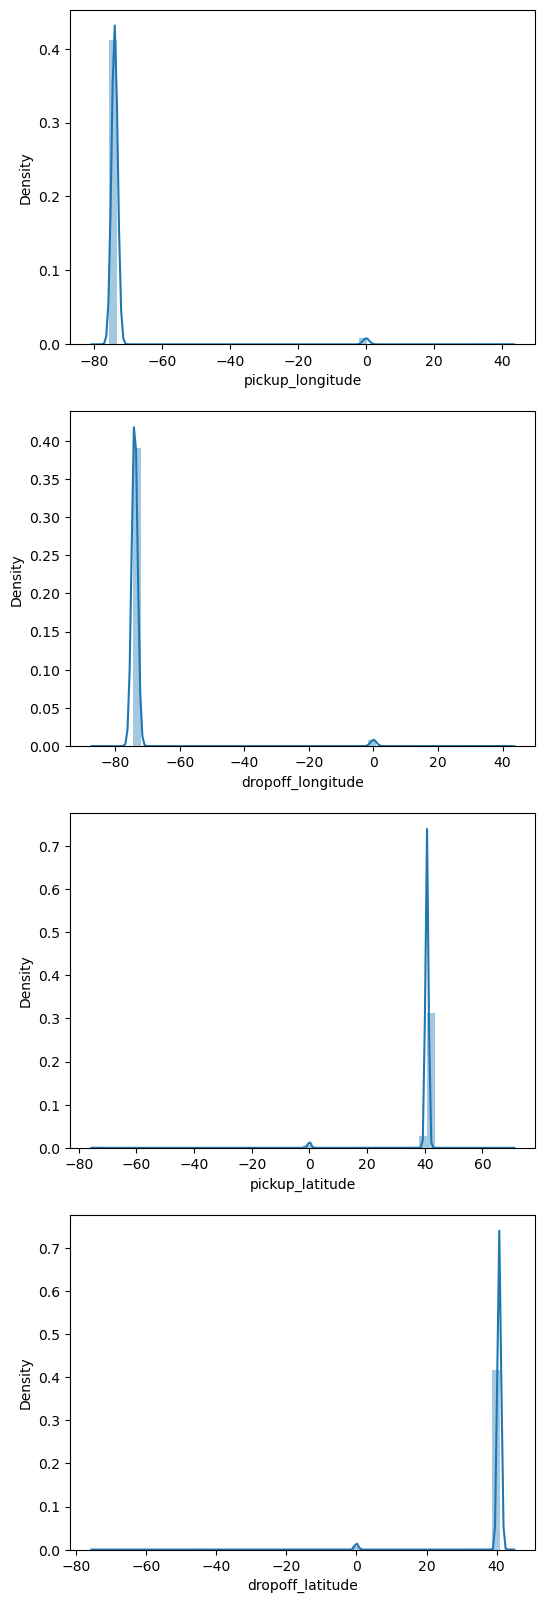

In [22]:
fig, axs = plt.subplots(4, figsize=(6,20))
sns.distplot(data['pickup_longitude'], ax=axs[0])
sns.distplot(data['dropoff_longitude'], ax=axs[1])
sns.distplot(data['pickup_latitude'], ax=axs[2])
sns.distplot(data['dropoff_latitude'], ax=axs[3])

In [23]:
data.drop(data[data['fare_amount']<=0].index,inplace=True)
data.drop(data[data['passenger_count']==0].index,inplace=True)

In [24]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,Distance
count,199262.000000,199262.000000,199262.000000,199262.000000,199262.000000,199262.000000,199262.000000,199262.000000,1.992620e+05
mean,11.352172,-72.513289,39.927400,-72.511466,39.927302,1.688470,2011.741652,3.039079,1.841134e+04
std,9.846891,10.397264,6.060304,10.400200,6.060996,1.305167,1.865087,1.949623,3.548523e+05
min,0.010000,-78.083332,-74.007670,-84.654241,-74.035197,1.000000,2009.000000,0.000000,0.000000e+00
25%,6.000000,-73.992049,40.735001,-73.991293,40.734092,1.000000,2010.000000,1.000000,1.216003e+03
50%,8.500000,-73.981741,40.752761,-73.980069,40.753228,1.000000,2012.000000,3.000000,2.118620e+03
75%,12.500000,-73.967065,40.767126,-73.963510,40.768070,2.000000,2013.000000,5.000000,3.872425e+03
max,500.000000,40.811147,69.400000,40.851027,43.415190,6.000000,2015.000000,6.000000,8.681359e+06


In [25]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 199262 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199262 non-null  float64
 1   pickup_longitude   199262 non-null  float64
 2   pickup_latitude    199262 non-null  float64
 3   dropoff_longitude  199262 non-null  float64
 4   dropoff_latitude   199262 non-null  float64
 5   passenger_count    199262 non-null  int64  
 6   year               199262 non-null  int64  
 7   day                199262 non-null  int64  
 8   Distance           199262 non-null  float64
 9   Monthly_Quarter    199262 non-null  object 
 10  Hourly_Segments    199262 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 18.2+ MB


In [26]:
nu = data.drop(['fare_amount'], axis=1).nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(data.drop(['fare_amount'], axis=1).shape[1]):
    if nu.values[i]<=24:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 5 numerical & 5 categorical features.


EXPLORATORY DATA ANALYSIS

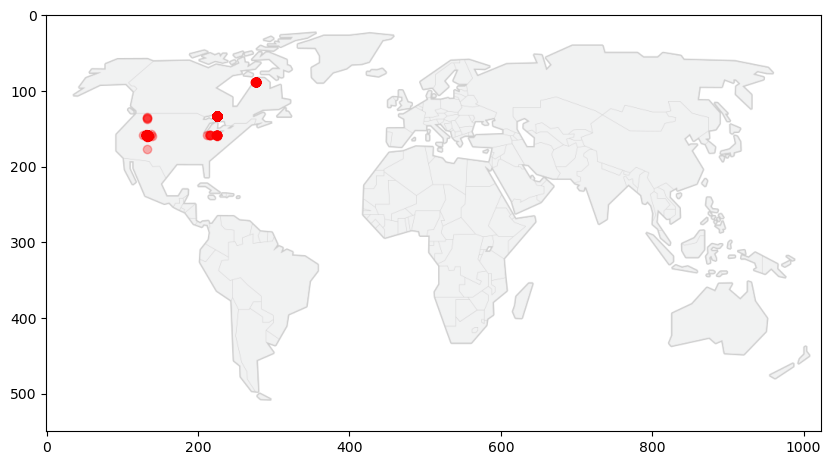

In [28]:
a=plt.imread('https://raw.githubusercontent.com/Masterx-AI/Project_Uber_Fare_Prediction/main/wm.png')
plt.imshow(a, alpha=0.2)
plt.scatter( (data.pickup_longitude+180)*1.25,(data.pickup_latitude+215)*0.62,alpha=0.3, color='red')
#mdf.plot(kind='scatter',x='pickup_latitude',y='pickup_longitude',alpha=0.1)
plt.show()

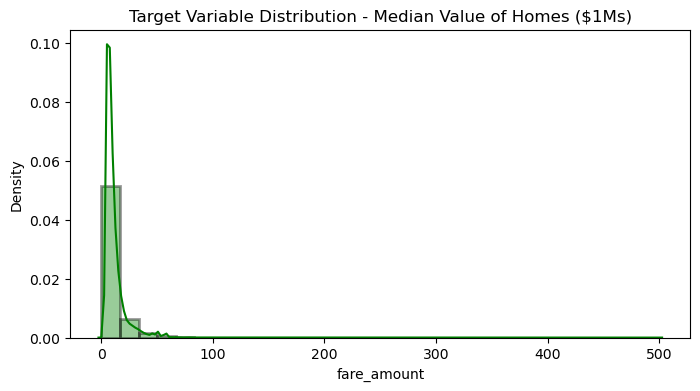

In [29]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(data['fare_amount'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

                               Visualising Categorical Features:                                


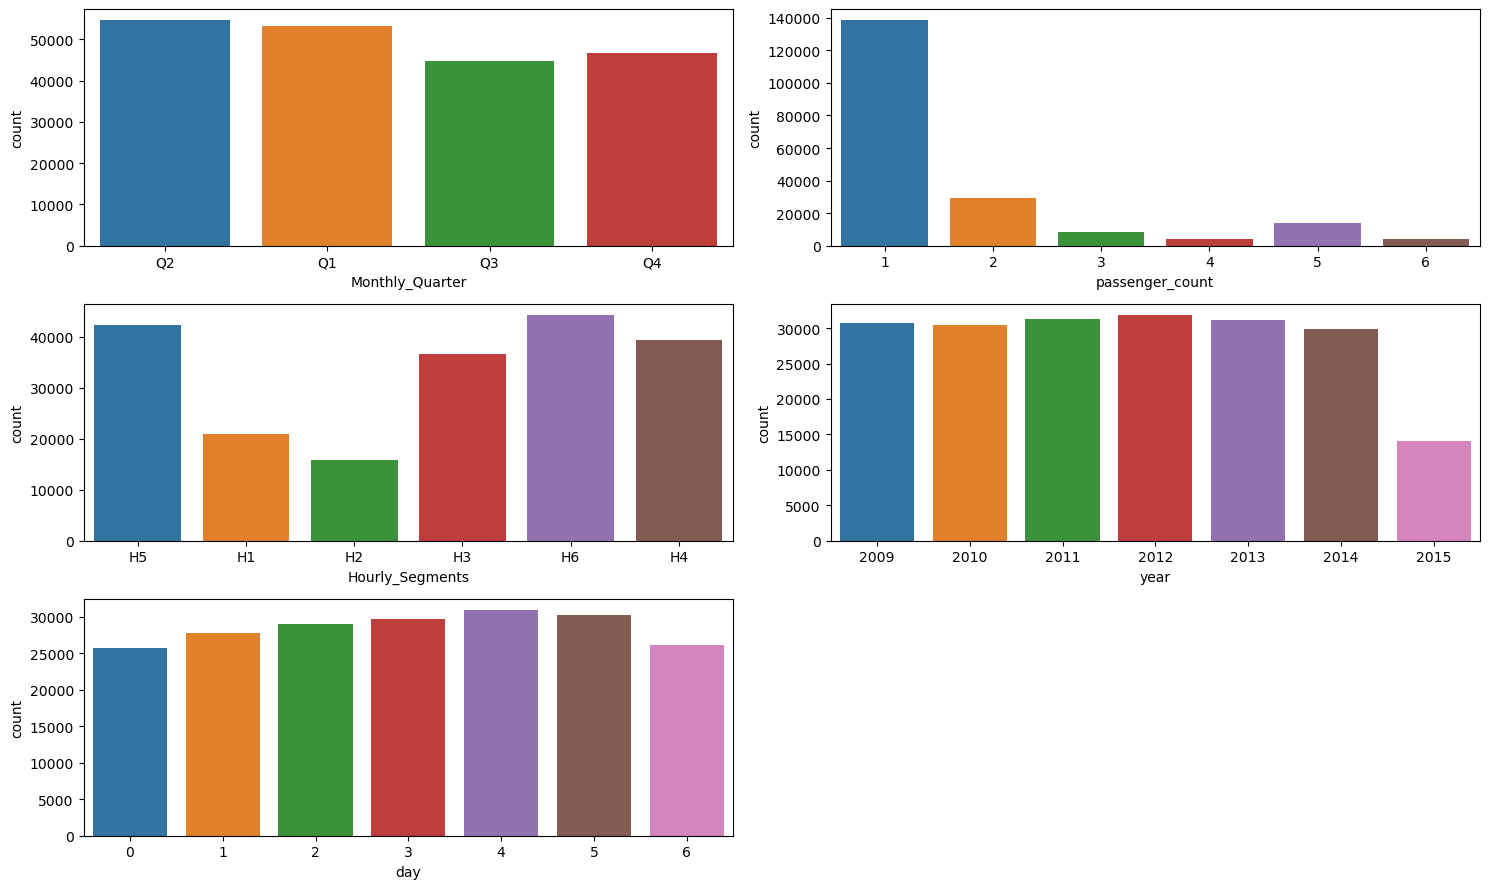

In [30]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

# for i in range(len(cf)):
#     if df[cf[i]].nunique()<=4:
#         plt.subplot(math.ceil(len(cf)/n),n,i+1)
#         sns.countplot(df[cf[i]])
#     else:
#         plt.subplot(math.ceil(len(cf)/2),2,i)
#         sns.countplot(df[cf[i]])

for i in range(len(cf)):
    if data[cf[i]].nunique()<=12:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(data[cf[i]])
    else:
        plt.subplot(3,1,i-3)
        sns.countplot(data[cf[i]])
        #plt.subplot(4,2,8)
        #sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()


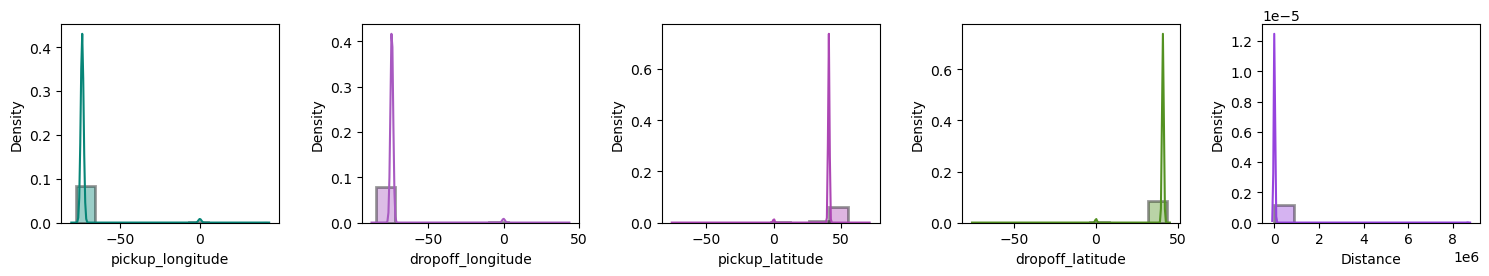

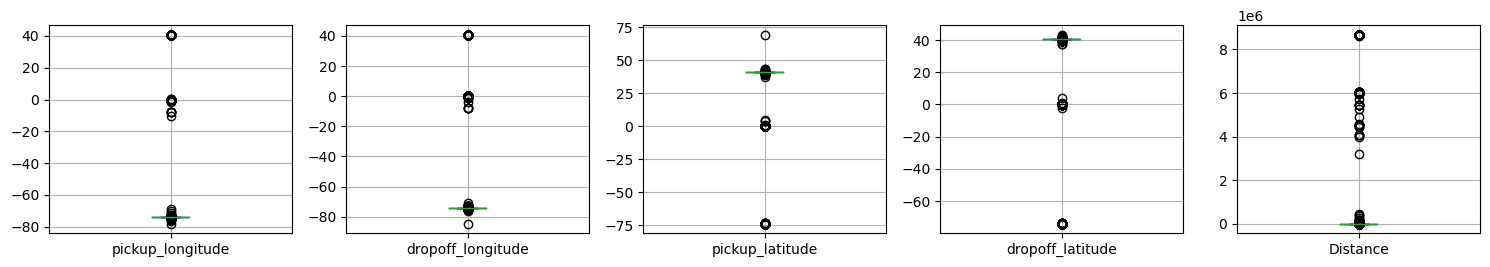

In [32]:
# print('\033[1mNumeric Features Distribution'.center(100))

n=5

plt.figure(figsize=[15,5*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(data[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,5*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    data.boxplot(nf[i])
plt.tight_layout()
plt.show()

In [33]:
counter = 0
rs,cs = original_df.shape

data.drop_duplicates(inplace=True)
data.drop(['pickup_latitude','pickup_longitude',
         'dropoff_latitude','dropoff_longitude'],axis=1)

if data.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-data.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 829


In [34]:
cat_features = ['Monthly_Quarter', 'passenger_count', 'Hourly_Segments', 'year', 'day']
for col in cat_features:
    if data[col].nunique() == 2:
        data = pd.concat([data.drop(col, axis=1), pd.get_dummies(data[col], prefix=col, drop_first=True)], axis=1)
data = pd.get_dummies(data, columns=[col for col in cat_features if data[col].nunique() > 2], prefix=cat_features)
print('Encoded dataset shape:', data.shape)

Encoded dataset shape: (199164, 36)


In [35]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 199164 entries, 0 to 199999
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         199164 non-null  float64
 1   pickup_longitude    199164 non-null  float64
 2   pickup_latitude     199164 non-null  float64
 3   dropoff_longitude   199164 non-null  float64
 4   dropoff_latitude    199164 non-null  float64
 5   Distance            199164 non-null  float64
 6   Monthly_Quarter_Q1  199164 non-null  uint8  
 7   Monthly_Quarter_Q2  199164 non-null  uint8  
 8   Monthly_Quarter_Q3  199164 non-null  uint8  
 9   Monthly_Quarter_Q4  199164 non-null  uint8  
 10  passenger_count_1   199164 non-null  uint8  
 11  passenger_count_2   199164 non-null  uint8  
 12  passenger_count_3   199164 non-null  uint8  
 13  passenger_count_4   199164 non-null  uint8  
 14  passenger_count_5   199164 non-null  uint8  
 15  passenger_count_6   199164 non-nul

In [36]:
data1 = data.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = data1[i].quantile(0.25)
    Q3 = data1[i].quantile(0.75)
    IQR = Q3 - Q1
    data1 = data1[data1[i] <= (Q3+(1.5*IQR))]
    data1 = data1[data1[i] >= (Q1-(1.5*IQR))]
    data1 = data1.reset_index(drop=True)
display(data1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(data.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(data1.shape[0]))

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,Monthly_Quarter_Q1,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,...,year_2013,year_2014,year_2015,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,5.7,-73.982738,40.761270,-73.991242,40.750562,1389.13,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,7.7,-73.987130,40.733143,-73.991567,40.758092,2795.79,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,5.3,-73.968095,40.768008,-73.956655,40.783762,1998.34,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,12.1,-74.000964,40.731630,-73.972892,40.758233,3787.98,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,7.5,-73.980002,40.751662,-73.973802,40.764842,1554.45,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0



Inference:
Before removal of outliers, The dataset had 199164 samples.
After removal of outliers, The dataset now has 162404 samples.


In [37]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162404 entries, 0 to 162403
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         162404 non-null  float64
 1   pickup_longitude    162404 non-null  float64
 2   pickup_latitude     162404 non-null  float64
 3   dropoff_longitude   162404 non-null  float64
 4   dropoff_latitude    162404 non-null  float64
 5   Distance            162404 non-null  float64
 6   Monthly_Quarter_Q1  162404 non-null  uint8  
 7   Monthly_Quarter_Q2  162404 non-null  uint8  
 8   Monthly_Quarter_Q3  162404 non-null  uint8  
 9   Monthly_Quarter_Q4  162404 non-null  uint8  
 10  passenger_count_1   162404 non-null  uint8  
 11  passenger_count_2   162404 non-null  uint8  
 12  passenger_count_3   162404 non-null  uint8  
 13  passenger_count_4   162404 non-null  uint8  
 14  passenger_count_5   162404 non-null  uint8  
 15  passenger_count_6   162404 non-nul

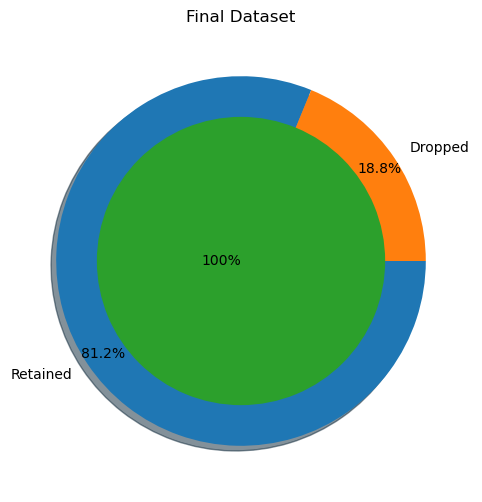


Inference: After the cleanup process, 37589 samples were dropped, while retaining 81.2% of the data.


In [38]:
data = data1.copy()
data.columns=[i.replace('-','_') for i in data.columns]

plt.title('Final Dataset')
plt.pie([data.shape[0], original_df.shape[0]-data.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([data.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-data.shape[0]} samples were dropped, \
while retaining {round(100 - ((original_df.shape[0]-data.shape[0])*100/(original_df.shape[0])),2)}% of the data.')


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162404 entries, 0 to 162403
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         162404 non-null  float64
 1   pickup_longitude    162404 non-null  float64
 2   pickup_latitude     162404 non-null  float64
 3   dropoff_longitude   162404 non-null  float64
 4   dropoff_latitude    162404 non-null  float64
 5   Distance            162404 non-null  float64
 6   Monthly_Quarter_Q1  162404 non-null  uint8  
 7   Monthly_Quarter_Q2  162404 non-null  uint8  
 8   Monthly_Quarter_Q3  162404 non-null  uint8  
 9   Monthly_Quarter_Q4  162404 non-null  uint8  
 10  passenger_count_1   162404 non-null  uint8  
 11  passenger_count_2   162404 non-null  uint8  
 12  passenger_count_3   162404 non-null  uint8  
 13  passenger_count_4   162404 non-null  uint8  
 14  passenger_count_5   162404 non-null  uint8  
 15  passenger_count_6   162404 non-nul

In [40]:
m=[]
for i in data.columns.values:
    m.append(i.replace(' ','_'))

    
data.columns = m
X = data.drop([target],axis=1)
Y = data[target]
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)
x_train.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',x_train.shape,y_train.shape,'\nTesting set   ---> ', x_test.shape,'', y_test.shape)

Original set  --->  (162404, 35) (162404,) 
Training set  --->  (113682, 35) (113682,) 
Testing set   --->  (48722, 35)  (48722,)


In [41]:
std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(x_train)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(x_test)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,Monthly_Quarter_Q1,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,passenger_count_1,...,year_2013,year_2014,year_2015,day_0,day_1,day_2,day_3,day_4,day_5,day_6
count,1.136820e+05,1.136820e+05,1.136820e+05,1.136820e+05,1.136820e+05,1.136820e+05,1.136820e+05,1.136820e+05,1.136820e+05,1.136820e+05,...,1.136820e+05,1.136820e+05,1.136820e+05,1.136820e+05,1.136820e+05,1.136820e+05,1.136820e+05,1.136820e+05,1.136820e+05,1.136820e+05
mean,7.025831e-13,3.147625e-13,8.583625e-13,-1.005911e-13,-3.878915e-16,6.187705e-16,-8.090715e-16,-1.258147e-15,9.199561e-16,1.119528e-14,...,1.083197e-15,7.903686e-16,-3.228626e-15,6.439844e-16,-1.491326e-15,1.311264e-15,2.784795e-15,5.233426e-17,-2.955963e-15,1.471899e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.969527e+00,-2.897884e+00,-2.920212e+00,-2.866291e+00,-1.621554e+00,-6.058686e-01,-6.113652e-01,-5.370019e-01,-5.551516e-01,-1.516104e+00,...,-4.291132e-01,-4.197608e-01,-2.734471e-01,-3.849808e-01,-4.040114e-01,-4.161887e-01,-4.210357e-01,-4.298172e-01,-4.222077e-01,-3.782342e-01
25%,-6.800158e-01,-6.811468e-01,-6.705713e-01,-6.606893e-01,-7.605703e-01,-6.058686e-01,-6.113652e-01,-5.370019e-01,-5.551516e-01,-1.516104e+00,...,-4.291132e-01,-4.197608e-01,-2.734471e-01,-3.849808e-01,-4.040114e-01,-4.161887e-01,-4.210357e-01,-4.298172e-01,-4.222077e-01,-3.782342e-01
50%,-6.016813e-02,4.487340e-02,-6.803001e-02,4.946202e-02,-2.340664e-01,-6.058686e-01,-6.113652e-01,-5.370019e-01,-5.551516e-01,6.595852e-01,...,-4.291132e-01,-4.197608e-01,-2.734471e-01,-3.849808e-01,-4.040114e-01,-4.161887e-01,-4.210357e-01,-4.298172e-01,-4.222077e-01,-3.782342e-01
75%,6.416058e-01,6.530329e-01,6.169478e-01,6.332964e-01,5.661549e-01,1.650523e+00,1.635684e+00,-5.370019e-01,-5.551516e-01,6.595852e-01,...,-4.291132e-01,-4.197608e-01,-2.734471e-01,-3.849808e-01,-4.040114e-01,-4.161887e-01,-4.210357e-01,-4.298172e-01,-4.222077e-01,-3.782342e-01
max,3.253679e+00,2.805410e+00,3.165715e+00,2.806695e+00,2.921249e+00,1.650523e+00,1.635684e+00,1.862191e+00,1.801310e+00,6.595852e-01,...,2.330387e+00,2.382309e+00,3.657014e+00,2.597532e+00,2.475178e+00,2.402756e+00,2.375096e+00,2.326570e+00,2.368502e+00,2.643865e+00



                                Standardardization on Testing set                                


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,Monthly_Quarter_Q1,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,passenger_count_1,...,year_2013,year_2014,year_2015,day_0,day_1,day_2,day_3,day_4,day_5,day_6
count,48722.000000,48722.000000,48722.000000,48722.000000,48722.000000,48722.000000,48722.000000,48722.000000,48722.000000,48722.000000,...,48722.000000,48722.000000,48722.000000,48722.000000,48722.000000,48722.000000,48722.000000,48722.000000,48722.000000,48722.000000
mean,0.003617,0.004003,0.006661,0.008806,0.002451,0.007713,0.003319,-0.007005,-0.004656,0.002618,...,0.007620,-0.011085,-0.002231,-0.003796,0.010653,-0.003258,-0.003814,-0.002233,0.001422,0.001187
std,0.996989,1.000961,1.002578,1.007989,0.998282,1.004001,1.001703,0.995333,0.997094,0.998885,...,1.007199,0.989011,0.996227,0.995795,1.010926,0.996763,0.996270,0.997888,1.001392,1.001354
min,-2.973404,-2.899234,-2.923171,-2.865829,-1.621554,-0.605869,-0.611365,-0.537002,-0.555152,-1.516104,...,-0.429113,-0.419761,-0.273447,-0.384981,-0.404011,-0.416189,-0.421036,-0.429817,-0.422208,-0.378234
25%,-0.675967,-0.685993,-0.665317,-0.662541,-0.757975,-0.605869,-0.611365,-0.537002,-0.555152,-1.516104,...,-0.429113,-0.419761,-0.273447,-0.384981,-0.404011,-0.416189,-0.421036,-0.429817,-0.422208,-0.378234
50%,-0.056010,0.044777,-0.065373,0.059866,-0.233929,-0.605869,-0.611365,-0.537002,-0.555152,0.659585,...,-0.429113,-0.419761,-0.273447,-0.384981,-0.404011,-0.416189,-0.421036,-0.429817,-0.422208,-0.378234
75%,0.645795,0.667078,0.628649,0.653441,0.569720,1.650523,1.635684,-0.537002,-0.555152,0.659585,...,-0.429113,-0.419761,-0.273447,-0.384981,-0.404011,-0.416189,-0.421036,-0.429817,-0.422208,-0.378234
max,3.253554,2.806113,3.162816,2.804940,2.921435,1.650523,1.635684,1.862191,1.801310,0.659585,...,2.330387,2.382309,3.657014,2.597532,2.475178,2.402756,2.375096,2.326570,2.368502,2.643865


                                       Correlation Matrix                                       


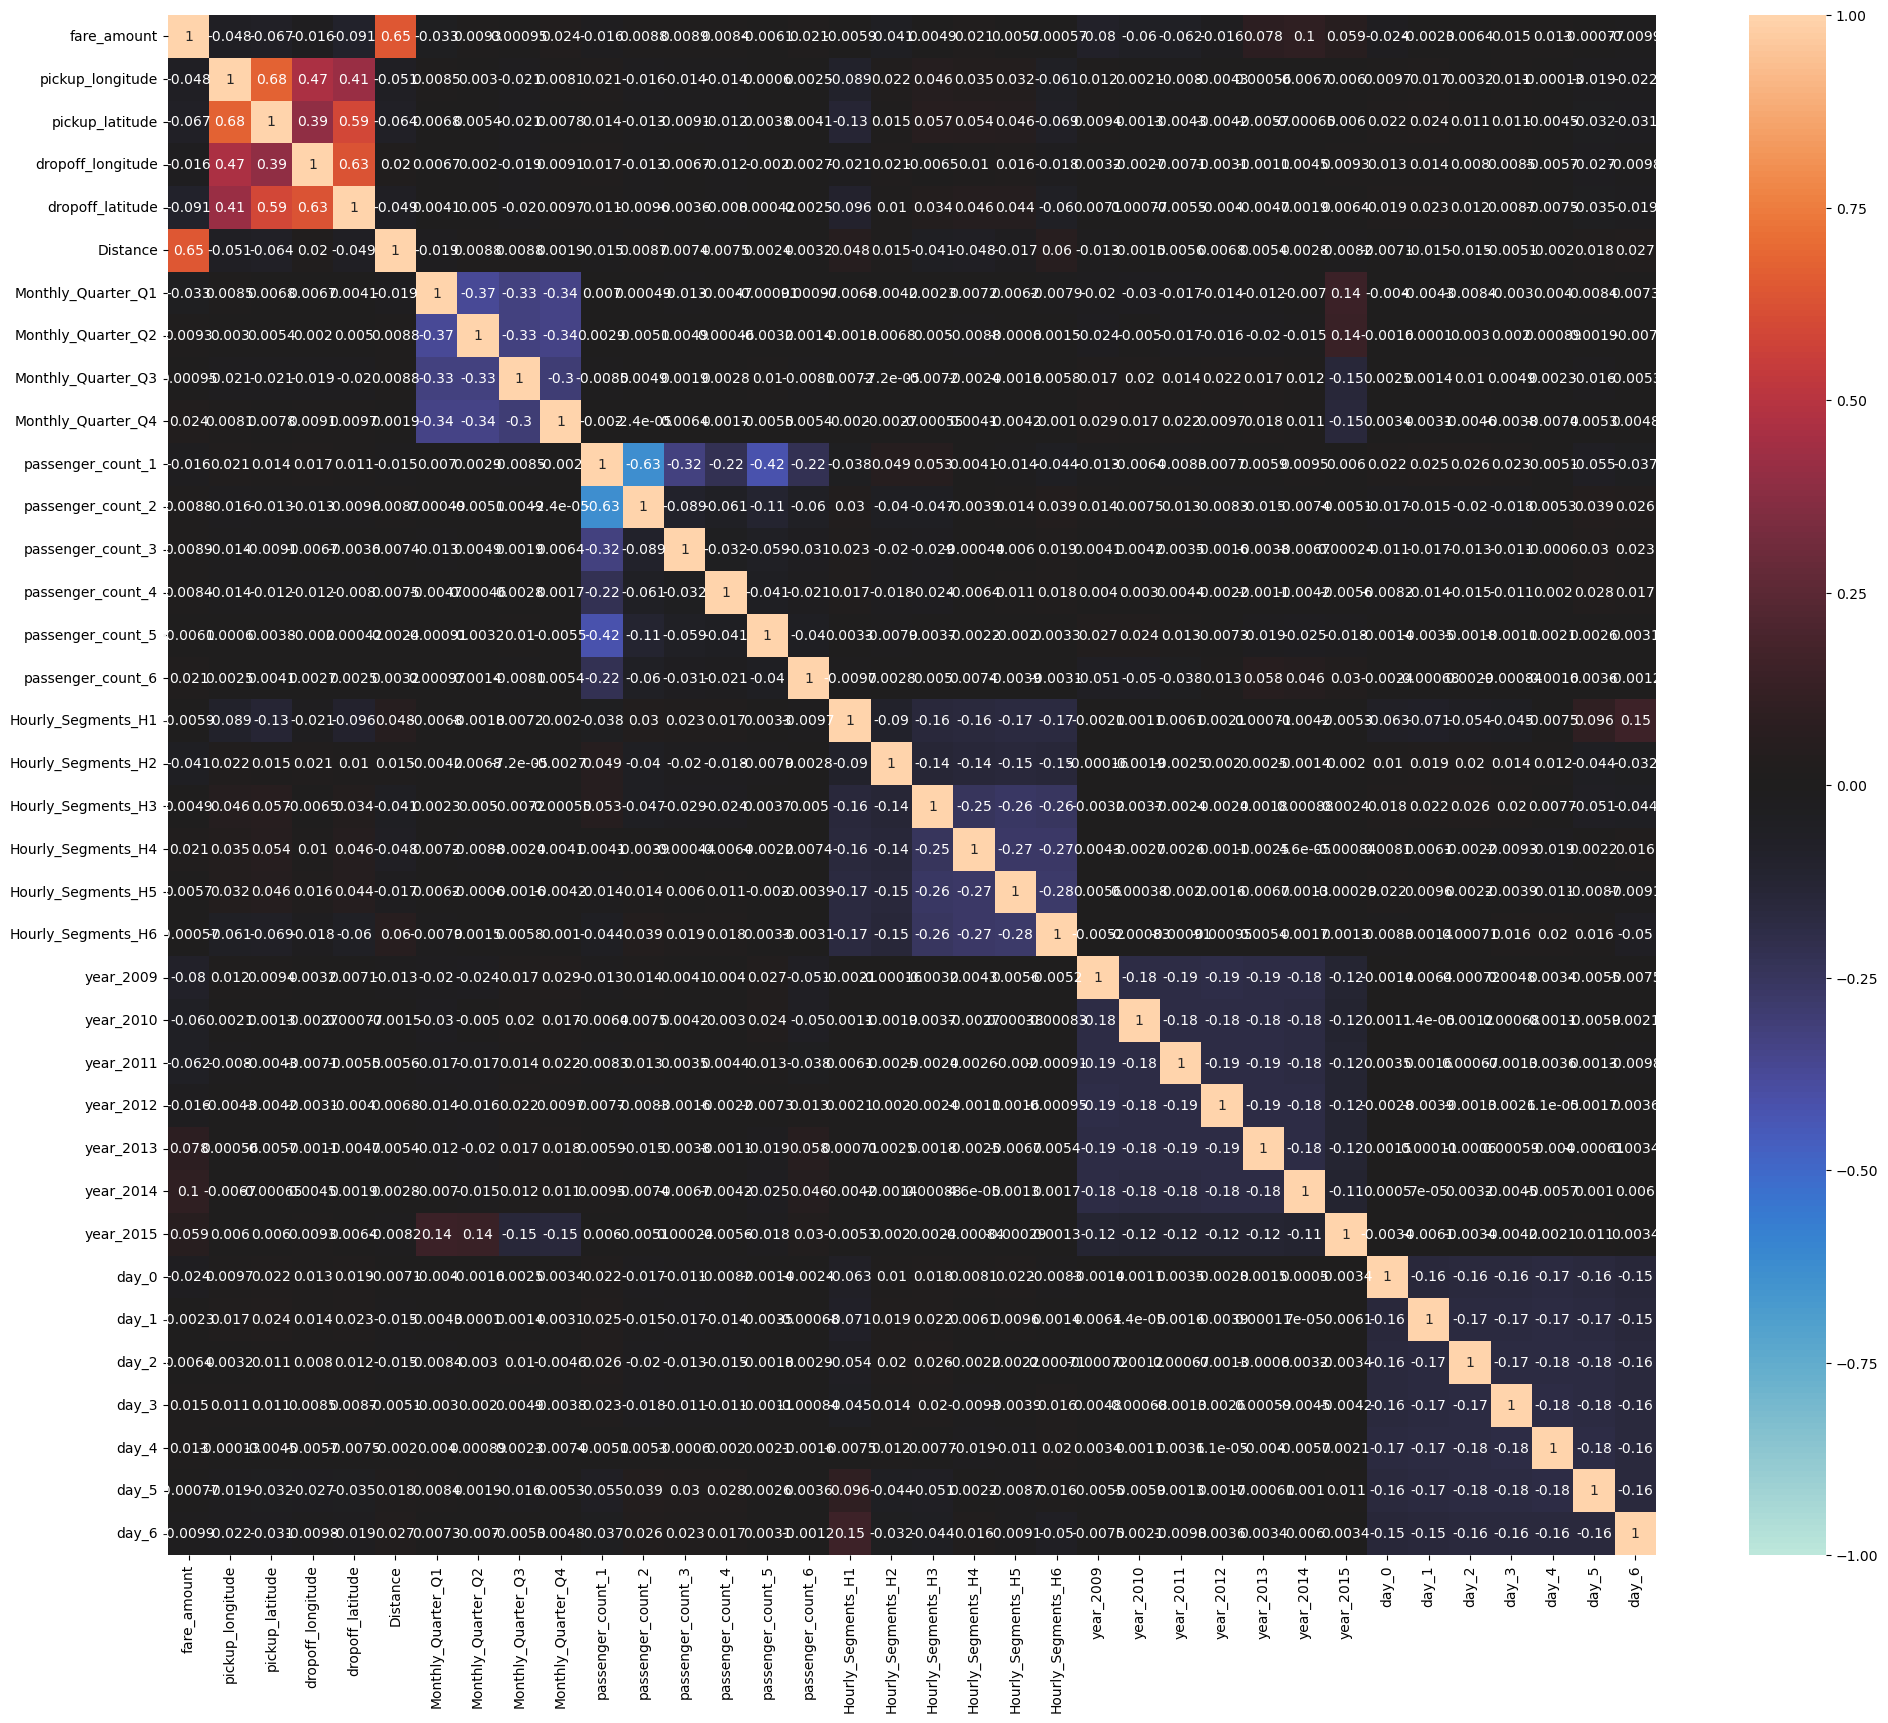

In [42]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[24,20])
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 34/34 [04:35<00:00,  8.11s/it]


Dropped Features -->  ['Hourly_Segments_H3', 'day_6', 'passenger_count_3', 'year_2009', 'Monthly_Quarter_Q1', 'passenger_count_1', 'pickup_latitude', 'day_4', 'dropoff_longitude', 'Hourly_Segments_H6', 'year_2013', 'Monthly_Quarter_Q4', 'day_3', 'year_2012', 'pickup_longitude', 'Hourly_Segments_H4', 'day_5', 'Monthly_Quarter_Q2', 'year_2014']


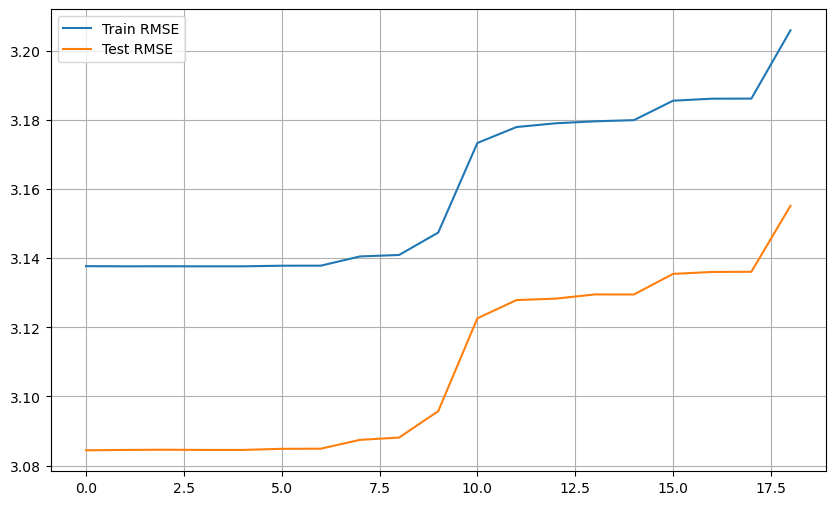

In [43]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[];# to store the training RMSE values
Tss=[];# to store the test RMSE values
n=3 # maximum degree of polynomial features to be used
order=['ord-'+str(i) for i in range(2,n)]
#Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
#Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

DROP=[];# to store the features that are dropped due to high VIF values
b=[]
# not used in the provided code


for i in tqdm(range(len(Train_X_std.columns)-1)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1) # exclude the dropped features from the feature set
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>=1.1:
        DROP.append(vif.loc[0][0]) # add the dropped feature to the list
        LR = LinearRegression() # create a new LinearRegression object
        LR.fit(Train_X_std.drop(DROP,axis=1),y_train) # train the model on the current feature set

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(y_train, pred1)))
        Tss.append(np.sqrt(mean_squared_error(y_test, pred2)))

        #Trd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
        #Tsd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)
        
print('Dropped Features --> ',DROP)
#plt.plot(b)
#plt.show()
#print(API.summary())

# plt.figure(figsize=[20,4])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162404 entries, 0 to 162403
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         162404 non-null  float64
 1   pickup_longitude    162404 non-null  float64
 2   pickup_latitude     162404 non-null  float64
 3   dropoff_longitude   162404 non-null  float64
 4   dropoff_latitude    162404 non-null  float64
 5   Distance            162404 non-null  float64
 6   Monthly_Quarter_Q1  162404 non-null  uint8  
 7   Monthly_Quarter_Q2  162404 non-null  uint8  
 8   Monthly_Quarter_Q3  162404 non-null  uint8  
 9   Monthly_Quarter_Q4  162404 non-null  uint8  
 10  passenger_count_1   162404 non-null  uint8  
 11  passenger_count_2   162404 non-null  uint8  
 12  passenger_count_3   162404 non-null  uint8  
 13  passenger_count_4   162404 non-null  uint8  
 14  passenger_count_5   162404 non-null  uint8  
 15  passenger_count_6   162404 non-nul

In [46]:
data.drop(['Hourly_Segments_H3', 'day_6', 'passenger_count_3', 'year_2009', 'Monthly_Quarter_Q1', 'passenger_count_1', 'pickup_latitude', 'day_4', 'dropoff_longitude', 'Hourly_Segments_H6', 'year_2013', 'Monthly_Quarter_Q4', 'day_3', 'year_2012', 'pickup_longitude', 'Hourly_Segments_H4', 'day_5', 'Monthly_Quarter_Q2', 'year_2014'],axis=1,inplace=True)

KeyError: "['Hourly_Segments_H3', 'day_6', 'passenger_count_3', 'year_2009', 'Monthly_Quarter_Q1', 'passenger_count_1', 'pickup_latitude', 'day_4', 'dropoff_longitude', 'Hourly_Segments_H6', 'year_2013', 'Monthly_Quarter_Q4', 'day_3', 'year_2012', 'pickup_longitude', 'Hourly_Segments_H4', 'day_5', 'Monthly_Quarter_Q2', 'year_2014'] not found in axis"

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162404 entries, 0 to 162403
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         162404 non-null  float64
 1   dropoff_latitude    162404 non-null  float64
 2   Distance            162404 non-null  float64
 3   Monthly_Quarter_Q3  162404 non-null  uint8  
 4   passenger_count_2   162404 non-null  uint8  
 5   passenger_count_4   162404 non-null  uint8  
 6   passenger_count_5   162404 non-null  uint8  
 7   passenger_count_6   162404 non-null  uint8  
 8   Hourly_Segments_H1  162404 non-null  uint8  
 9   Hourly_Segments_H2  162404 non-null  uint8  
 10  Hourly_Segments_H5  162404 non-null  uint8  
 11  year_2010           162404 non-null  uint8  
 12  year_2011           162404 non-null  uint8  
 13  year_2015           162404 non-null  uint8  
 14  day_0               162404 non-null  uint8  
 15  day_1               162404 non-nul

In [49]:
m=[]
for i in data.columns.values:
    m.append(i.replace(' ','_'))

    
data.columns = m
X = data.drop([target],axis=1)
Y = data[target]
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)
x_train.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',x_train.shape,y_train.shape,'\nTesting set   ---> ', x_test.shape,'', y_test.shape)

Original set  --->  (162404, 16) (162404,) 
Training set  --->  (113682, 16) (113682,) 
Testing set   --->  (48722, 16)  (48722,)


In [50]:
def evaluate_models(models, x_train, y_train, x_test, y_test):
    """
    Fits each model to the training data and evaluates its performance on the testing data.
    Returns a DataFrame of the performance metrics (MAE, MSE, RMSE, R-squared, Accuracy)
    for each model, as well as plots of the actual vs predicted fares for each model.
    
    Parameters:
    models (dict): A dictionary of model objects, where the keys are model names and the values are model objects.
    x_train (pd.DataFrame): The training feature data.
    y_train (pd.Series): The training target data.
    x_test (pd.DataFrame): The testing feature data.
    y_test (pd.Series): The testing target data.
    
    Returns:
    results (pd.DataFrame): A DataFrame of the performance metrics (MAE, MSE, RMSE, R-squared, Accuracy)
    for each model.
    """
    results = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R-squared', 'Accuracy'])

    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        accuracy = model.score(x_test, y_test)

        results = results.append({'Model': name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse,
                                  'R-squared': r2, 'Accuracy': accuracy}, ignore_index=True)

        # Plot actual vs predicted fares
        plt.figure(figsize=(8, 6))
        ax = sns.scatterplot(x=y_test.values, y=y_pred, alpha=0.5)
        ax.set_xlabel('Actual Fare')
        ax.set_ylabel('Predicted Fare')
        ax.set_title(f'{name} Predictions')
        plt.show()

    return results


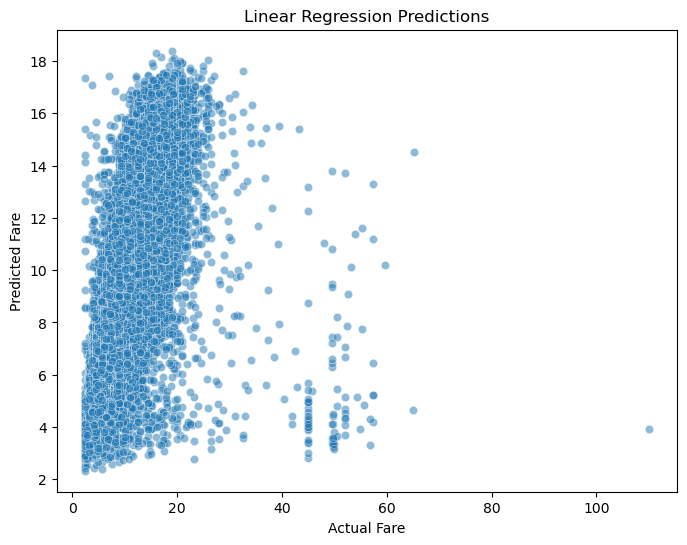

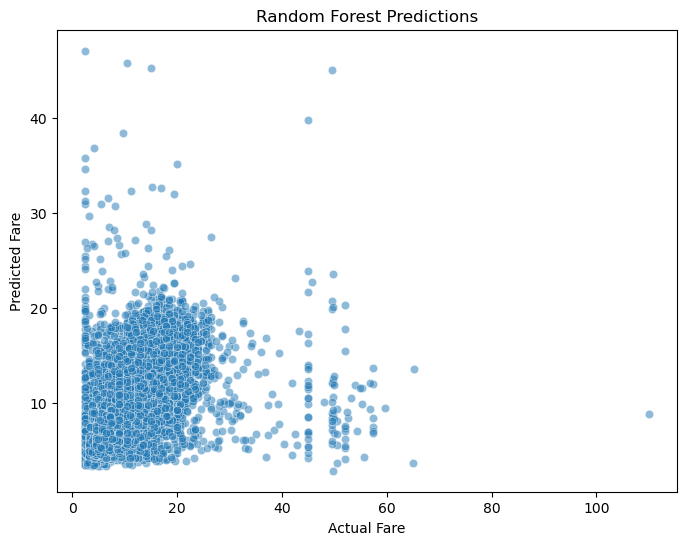

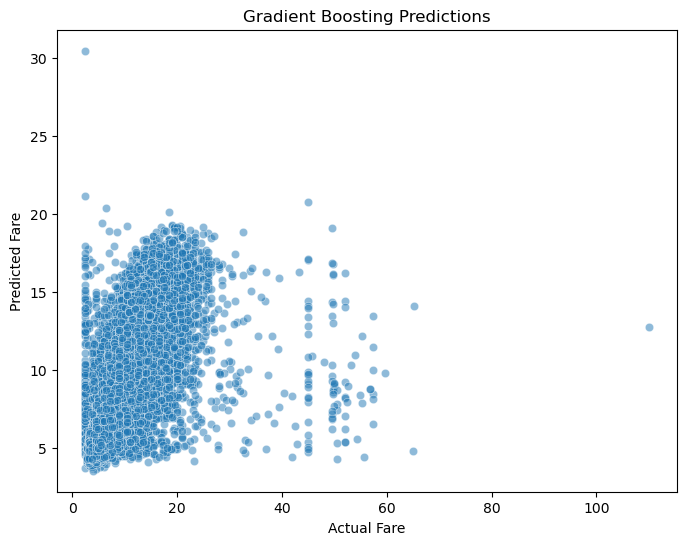

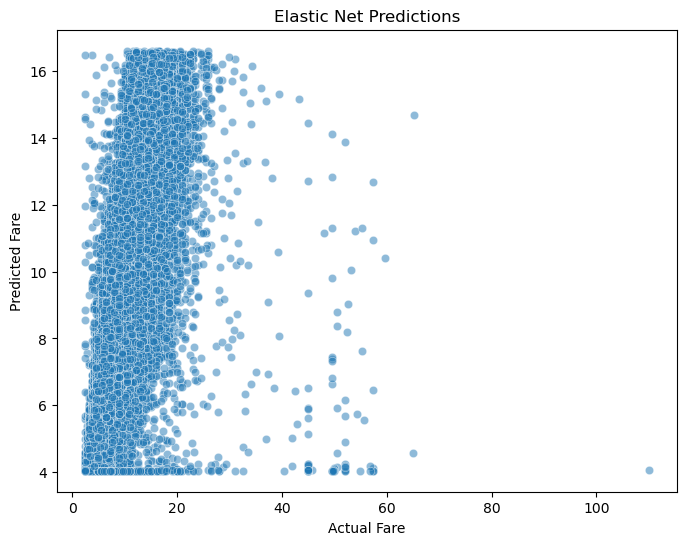

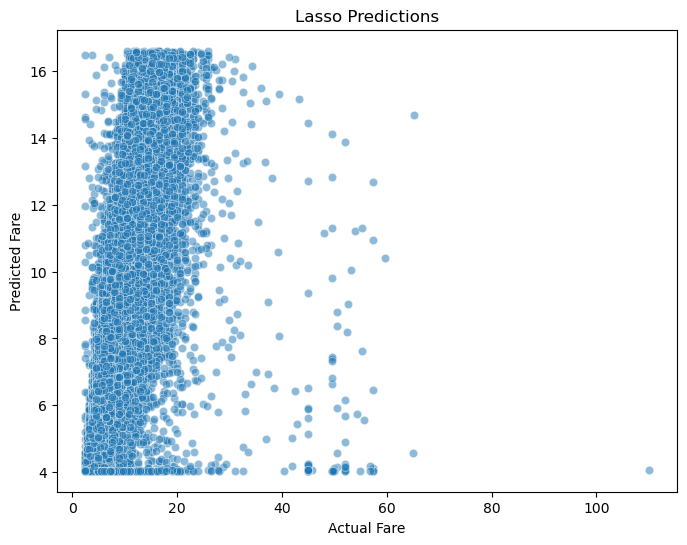

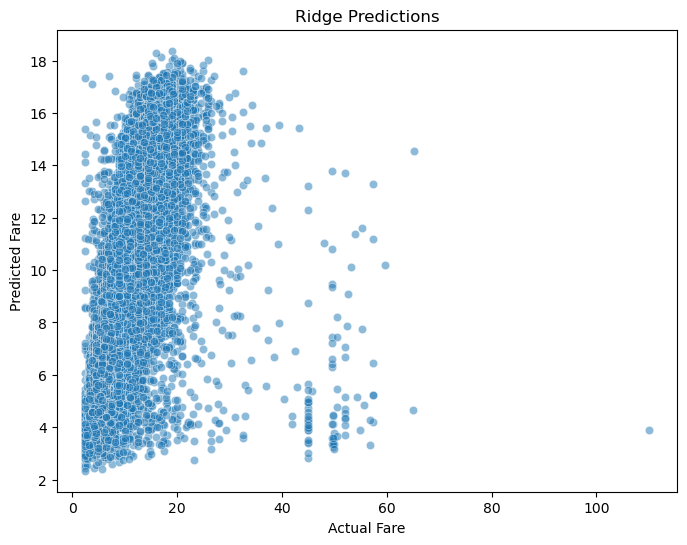

               Model       MAE        MSE      RMSE  R-squared  Accuracy
0  Linear Regression  1.730043   9.955007  3.155156   0.446017  0.446017
1      Random Forest  1.788703  10.275161  3.205489   0.428201  0.428201
2  Gradient Boosting  1.661121   9.112654  3.018717   0.492893  0.492893
3        Elastic Net  1.814208  10.361616  3.218946   0.423390  0.423390
4              Lasso  1.814243  10.361614  3.218946   0.423390  0.423390
5              Ridge  1.730048   9.955222  3.155190   0.446005  0.446005


In [51]:
models = {'Linear Regression': LinearRegression(),
          'Random Forest': RandomForestRegressor(),
          'Gradient Boosting': GradientBoostingRegressor(),
          'Elastic Net': ElasticNet(),
         'Lasso':Lasso(),
         'Ridge':Ridge()}

results = evaluate_models(models,x_train, y_train,x_test, y_test)
print(results)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162404 entries, 0 to 162403
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         162404 non-null  float64
 1   dropoff_latitude    162404 non-null  float64
 2   Distance            162404 non-null  float64
 3   Monthly_Quarter_Q3  162404 non-null  uint8  
 4   passenger_count_2   162404 non-null  uint8  
 5   passenger_count_4   162404 non-null  uint8  
 6   passenger_count_5   162404 non-null  uint8  
 7   passenger_count_6   162404 non-null  uint8  
 8   Hourly_Segments_H1  162404 non-null  uint8  
 9   Hourly_Segments_H2  162404 non-null  uint8  
 10  Hourly_Segments_H5  162404 non-null  uint8  
 11  year_2010           162404 non-null  uint8  
 12  year_2011           162404 non-null  uint8  
 13  year_2015           162404 non-null  uint8  
 14  day_0               162404 non-null  uint8  
 15  day_1               162404 non-nul

In [53]:
X = data[['Distance']]
Y = data[['fare_amount']]

# Split the dataset into training and testing sets
X_train, x_test, Y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

# Reset the index of the training set
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)


In [60]:
model1=GradientBoostingRegressor()
model1.fit(X_train,Y_train)
y_pred = model1.predict(x_test)

In [1]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.barplot(x='Model', y='MSE', data=results, ax=axs[0])
sns.barplot(x='Model', y='MAE', data=results, ax=axs[1])
sns.barplot(x='Model', y='R-squared', data=results, ax=axs[2])
axs[0].set(title='Mean Squared Error', ylabel='MSE')
axs[1].set(title='Mean Absolute Error', ylabel='MAE')
axs[2].set(title='R-squared', ylabel='R-squared')
plt.show()

NameError: name 'plt' is not defined

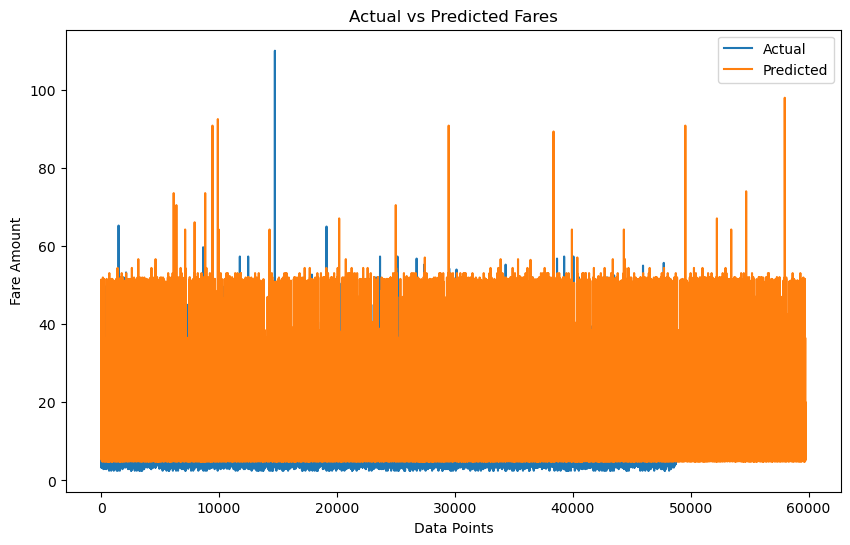

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Create a line plot of actual and predicted values
plt.plot(np.arange(len(y_test)), y_test, label='Actual')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted')

# Add labels and title to the plot
plt.xlabel('Data Points')
plt.ylabel('Fare Amount')
plt.title('Actual vs Predicted Fares')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163025 entries, 0 to 163024
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         163025 non-null  float64
 1   dropoff_latitude    163025 non-null  float64
 2   Distance            163025 non-null  float64
 3   Monthly_Quarter_Q2  163025 non-null  uint8  
 4   passenger_count_0   163025 non-null  uint8  
 5   passenger_count_2   163025 non-null  uint8  
 6   passenger_count_4   163025 non-null  uint8  
 7   passenger_count_5   163025 non-null  uint8  
 8   passenger_count_6   163025 non-null  uint8  
 9   Hourly_Segments_H1  163025 non-null  uint8  
 10  Hourly_Segments_H2  163025 non-null  uint8  
 11  Hourly_Segments_H5  163025 non-null  uint8  
 12  year_2010           163025 non-null  uint8  
 13  year_2014           163025 non-null  uint8  
 14  year_2015           163025 non-null  uint8  
 15  day_0               163025 non-nul

In [62]:
import joblib
import numpy as np
model1 = joblib.load('gbm_model.pkl')



In [63]:
def predict_fare(distance):
    # Preprocess the input feature
    features = np.array([[distance]])

    # Predict the fare
    fare_prediction = model1.predict(features)[0]

    return fare_prediction
fare = predict_fare(5.0)

In [64]:
fare

17.553198220977027

In [61]:
import pickle

# Assume you have trained your GBM model and stored it in a variable called 'model'

# Open a file in binary mode and write the model to it
with open('gbm_model.pkl', 'wb') as file:
    pickle.dump(model1, file)
